In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('fivethirtyeight')

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12
5,South Latoya,2019-03-11 12:26,9.52,1.995000e+12
6,New Paulville,2019-02-27 11:17,43.25,7.932080e+11
7,Simpsonburgh,2019-04-26 0:43,35.98,1.119540e+11
8,South Karenland,2019-01-08 3:28,35.09,7.995620e+12
9,North Jasmine,2019-03-09 6:26,42.81,5.327640e+12


In [5]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the columns and the rows that are not null. TO ENSURE NO NULL VALUE
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the data types of each column.
city_data_df.dtypes


city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city. TO CHECK HOW MANY DATA POINT FOR EACH CITY TYPE
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Combine the data into a single dataset
pyber_data_df = pd.merge( ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12,46,Urban


In [10]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12,46,Urban


In [11]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [12]:
# Get the sum of the fares for each city type.
total_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [13]:
#Get the sum of rides for each city type
total_rides_by_type=pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [14]:
#Get the drivers count for each city type
total_drivers_by_type=city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [15]:
# Get Average fare per ride for each city type
average_fare_per_ride=pyber_data_df.groupby(["type"]).mean()["fare"]
average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [16]:
# Get the average fare per driver for each city type
average_fare_per_driver=total_fares_by_type/total_drivers_by_type
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [17]:
#Create a data frame
pyber_summary_df = pd.DataFrame({
             
             "Total Rides": total_rides_by_type,
             "Total Drivers": total_drivers_by_type,
             "Total Fares":total_fares_by_type,
             "Average Fare per Ride":average_fare_per_ride,
             "Average Fare per Driver":average_fare_per_driver})


In [18]:
# Remove index name by setting it to "none"
pyber_summary_df.index.name=None


In [19]:
# Obtain Data frame 
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [20]:

# Format Data Frame
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)




In [21]:
# Formatted Data Frame
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [22]:
# Rename DataFrame columns

pyber_data_df.rename(columns={'city':'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'},inplace=True)

In [23]:
# Rename Data Frame output
pyber_data_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12,46,Urban


In [24]:
# Set index to datetime

# index=pd.DatetimeIndex(index))
pyber_data_df.index = pd.DatetimeIndex(pyber_data_df['Date'])


In [25]:
# Check index to ensure it is set to DatetimeIndex
pyber_data_rename_df = pyber_data_df
pyber_data_df.index

DatetimeIndex(['2019-01-14 10:14:00', '2019-03-04 18:24:00',
               '2019-02-24 04:29:00', '2019-02-10 23:22:00',
               '2019-03-06 04:28:00', '2019-03-11 12:26:00',
               '2019-02-27 11:17:00', '2019-04-26 00:43:00',
               '2019-01-08 03:28:00', '2019-03-09 06:26:00',
               ...
               '2019-04-19 04:32:00', '2019-03-18 10:38:00',
               '2019-01-27 18:43:00', '2019-04-29 01:58:00',
               '2019-01-30 10:55:00', '2019-04-29 17:04:00',
               '2019-01-30 00:05:00', '2019-02-10 21:03:00',
               '2019-05-07 19:22:00', '2019-04-25 10:20:00'],
              dtype='datetime64[ns]', name='Date', length=2375, freq=None)

In [26]:
## Use Copy() function to create new Data frame
New_pyber_df = pyber_data_rename_df[["City Type","Fare"]].copy()
New_pyber_df.head()

,City Type,Fare
Date,,
2019-01-14 10:14:00,Urban,13.83
2019-03-04 18:24:00,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:00,Urban,23.44
2019-03-06 04:28:00,Urban,34.58


In [27]:
# Use info () to check confirm index of new data frame
New_pyber_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:00 to 2019-04-25 10:20:00
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [28]:
# Use groupby () function to group fares by City & Date and create a data frame

Fares_by_cities_Dates= pd.DataFrame({"Fare": New_pyber_df.groupby(["City Type","Date"]).sum()["Fare"]}) 
Fares_by_cities_Dates


Fare
City Type Date                      
Rural     2019-01-01 09:45:00  43.69
          2019-01-02 11:18:00  52.12
          2019-01-03 19:51:00  19.90
          2019-01-04 03:31:00  24.88
          2019-01-06 07:38:00  47.33
...                              ...
Urban     2019-05-08 04:20:00  21.99
          2019-05-08 04:39:00  18.45
          2019-05-08 07:29:00  18.55
          2019-05-08 11:38:00  19.77
          2019-05-08 13:10:00  18.04

[2364 rows x 1 columns]

In [29]:
## Reset data frame's index
df_reset=Fares_by_cities_Dates.reset_index()
df_reset

,City Type,Date,Fare
0,Rural,2019-01-01 09:45:00,43.69
1,Rural,2019-01-02 11:18:00,52.12
2,Rural,2019-01-03 19:51:00,19.90
3,Rural,2019-01-04 03:31:00,24.88
4,Rural,2019-01-06 07:38:00,47.33
...,...,...,...
2359,Urban,2019-05-08 04:20:00,21.99
2360,Urban,2019-05-08 04:39:00,18.45
2361,Urban,2019-05-08 07:29:00,18.55
2362,Urban,2019-05-08 11:38:00,19.77


In [30]:
# Create a Pivot Data Frame 
Pivot_data_df= pd.pivot_table(df_reset, values="Fare", index=["Date"],
                    columns=['City Type'] )
Pivot_data_df.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75


In [31]:
#Create new dataframe using loc function and the given time range

New_Data_Frame= Pivot_data_df.loc["2019-01-01":"2019-04-28"]
New_Data_Frame

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:00,NaN,NaN,11.46
2019-04-28 16:29:00,NaN,NaN,36.42
2019-04-28 17:26:00,NaN,NaN,31.43


In [32]:
# Create a new data frame using resampling() and sum() method

Resampled_df=New_Data_Frame.resample('W').sum()
Resampled_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


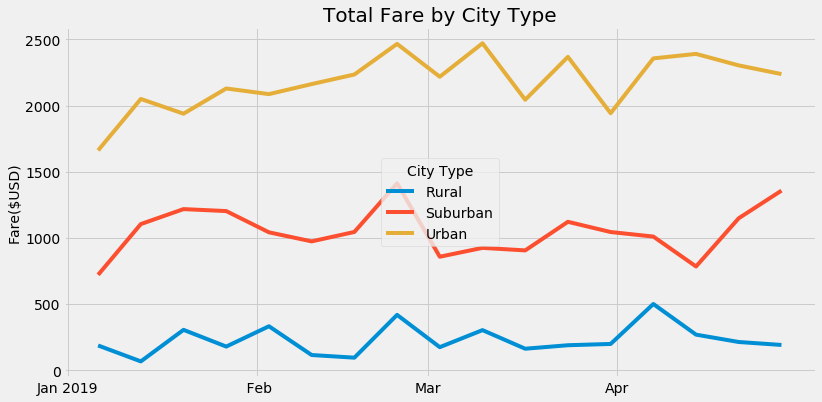

In [33]:
# Plot Multiple line graph using Five Thirty Eight Style
fig, ax= plt.subplots(figsize = (12,6))

# Plotting Fares for Rural, Suburban & Urban City Type
ax.plot(Resampled_df["Rural"],label="Rural")
ax.plot(Resampled_df["Suburban"],label="Suburban")
ax.plot(Resampled_df["Urban"],label= "Urban")

# Add the title, y-axis label and grid.
ax.set_title("Total Fare by City Type", size = 20)
ax.set_ylabel("Fare($USD)", size = 14)
ax.legend(loc="center",title = "City Type")
plt.xticks([737060,737091,737119,737150], ["Jan 2019"," Feb", "Mar", "Apr"])

# Save the figure.
plt.savefig("analysis/Fig 8.png")
plt.show()
